<a href="https://colab.research.google.com/github/muhammadbilalakbar021/CNN-for-VR/blob/master/creatingDataSet__Cleaning_it.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
classes = ['teddys','grizzly','black']

In [0]:
folder = 'black'
file = 'urls_black.txt'

In [0]:
path = Path('/content/drive/My Drive/Colab Notebooks/data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)


In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
folder = 'teddys'
file = 'urls_teddys.txt'

In [0]:
folder = 'grizzly'
file = 'urls_grizzly.txt'

In [0]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=500)

In [0]:
 np.random.seed(42)
 data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
         ds_tfms=get_transforms(), size=64, num_workers=0).normalize(imagenet_stats)

In [16]:
data.classes

['black', 'grizzly', 'teddys']

In [17]:
path.ls()


[PosixPath('/content/drive/My Drive/Colab Notebooks/data/bears/black'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/data/bears/teddys'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/data/bears/grizzly'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/data/bears/urls_black.txt'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/data/bears/urls_teddys.txt'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/data/bears/urls_grizzly.txt'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/data/bears/models'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/data/bears/cleaned.csv')]

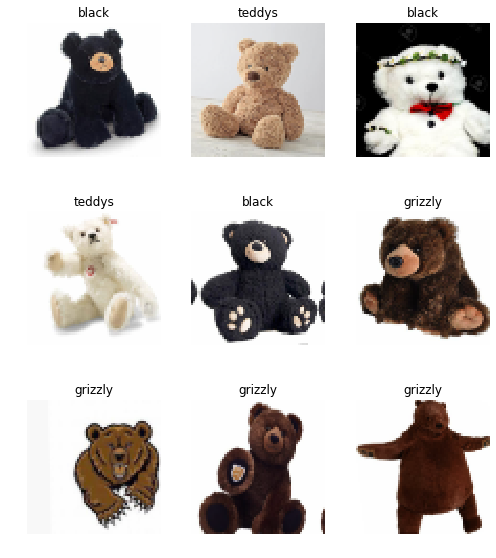

In [18]:
data.show_batch(rows=3, figsize=(7,8))


In [19]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['black', 'grizzly', 'teddys'], 3, 231, 57)

In [20]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)



Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 70387145.18it/s]


In [21]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,1.418546,0.800528,0.298246,00:05
1,1.101876,0.968530,0.315789,00:03
2,0.922303,1.031330,0.280702,00:03
3,0.810331,0.982782,0.280702,00:03


In [0]:
learn.save('stage-1')


In [29]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (228 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
teddys,teddys,teddys,teddys,teddys
Path: /content/drive/My Drive/Colab Notebooks/data/bears;

Valid: LabelList (57 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
teddys,grizzly,black,grizzly,teddys
Path: /content/drive/My Drive/Colab Notebooks/data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): B

In [0]:
learn.unfreeze()


In [24]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


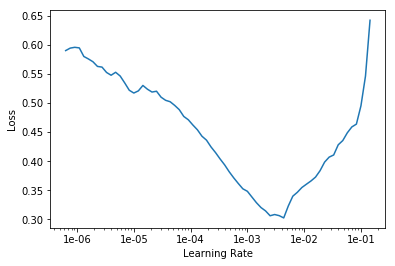

In [25]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))


epoch,train_loss,valid_loss,error_rate,time
0,0.571155,0.832783,0.280702,00:03
1,0.479102,0.718375,0.228070,00:03


In [0]:
learn.save('stage-2')


In [0]:
learn.load('stage-2');


In [0]:
interp = ClassificationInterpretation.from_learner(learn)


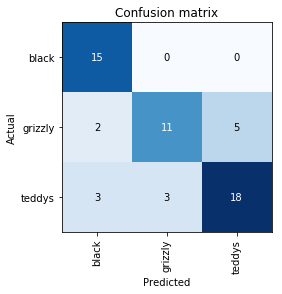

In [30]:
interp.plot_confusion_matrix()


In [0]:
from fastai.widgets import *


In [0]:

db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)


In [43]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)


Getting activations...


Computing similarities...


In [0]:
ImageCleaner(ds, idxs, path, duplicates=True)


In [0]:
learn.export()


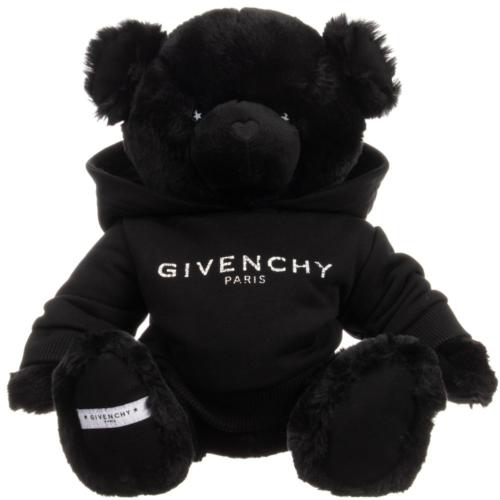

In [39]:
img = open_image(path/'black'/'00000034.jpg')
img


In [0]:
learn = load_learner(path)


In [0]:
pred_class,pred_idx,outputs = learn.predict(img)


In [42]:
pred_class

Category black